# Medical Cost Personal Insurance Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA and Visualizations

Text(0.5, 1.0, 'Distribution of Charges')

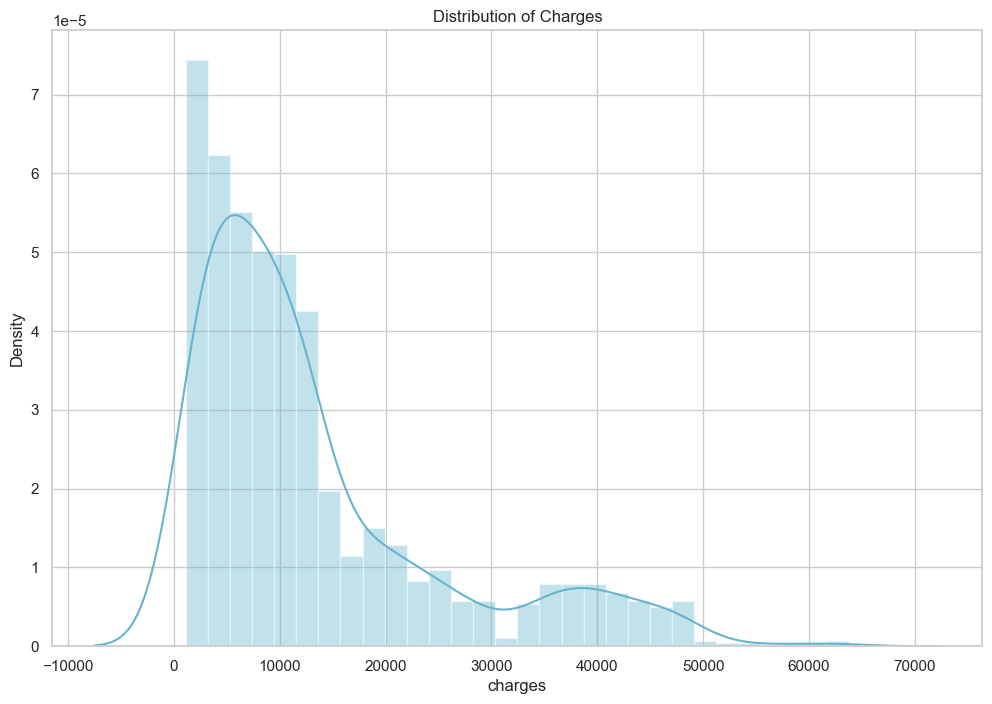

In [9]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

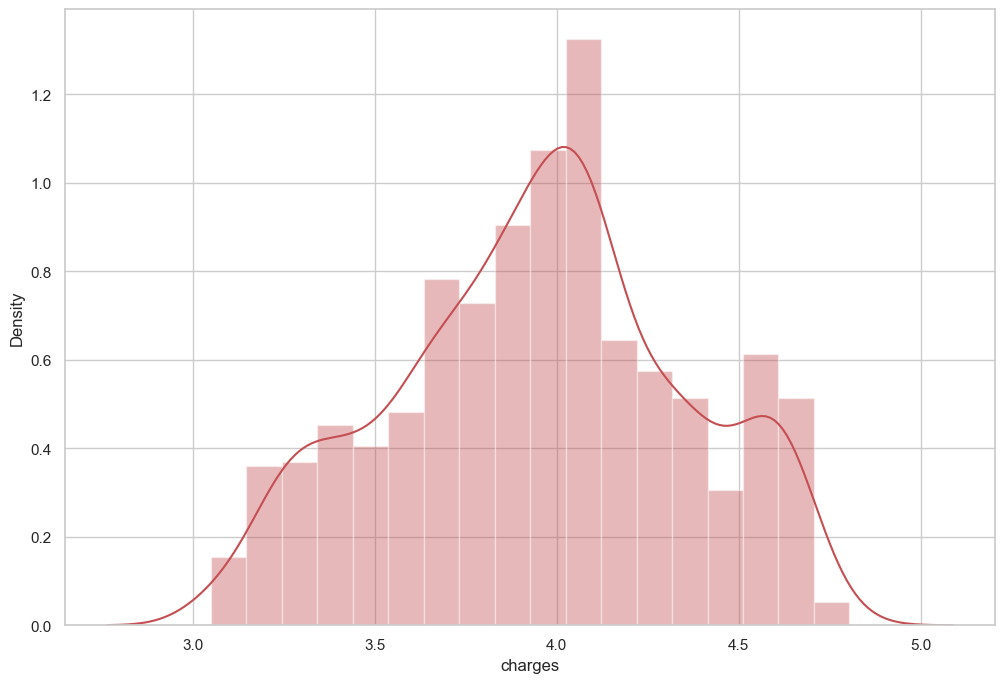

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

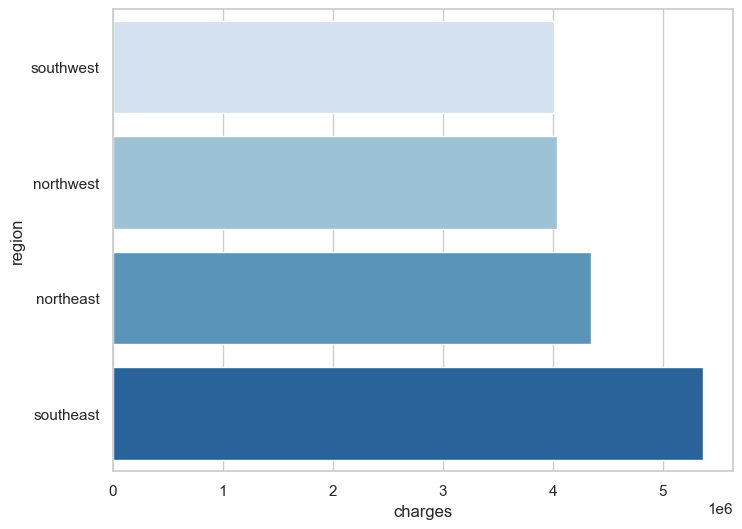

In [11]:
#Now we are calculating total charges by region column
#sorting it by ascending value and  creating a bar plot to visualize the top few regions with the lowest charges
charges = df['charges'].groupby(df.region).sum().sort_values(ascending =True)
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette= 'Blues')

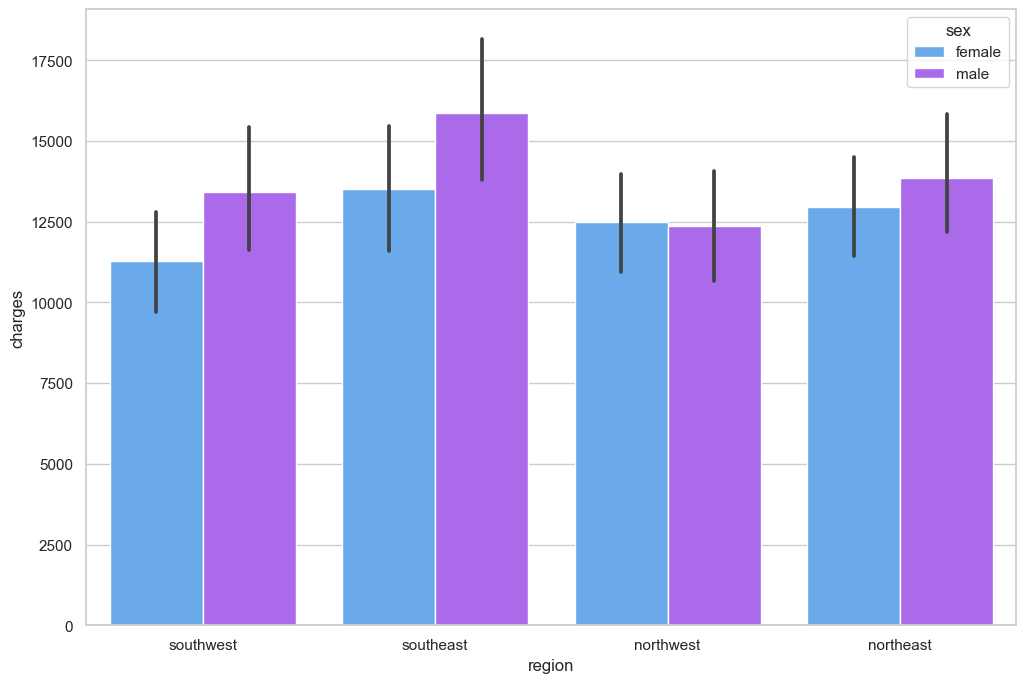

In [12]:
#Now I want to compare the charges across different regions with the bars further grouped by sex using hue parameter
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

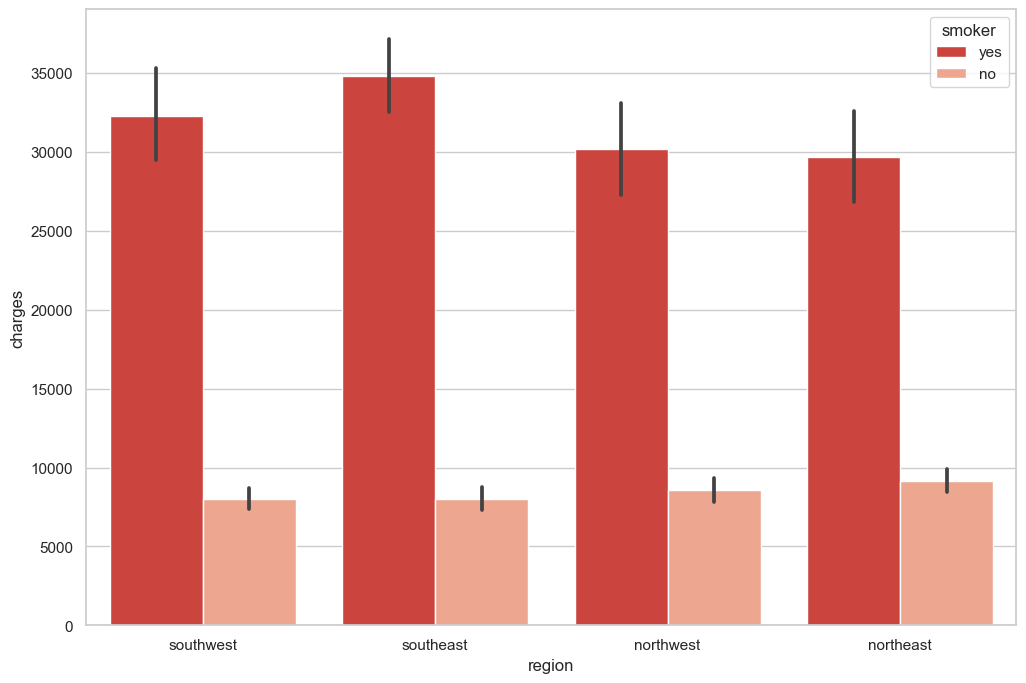

In [13]:
# Now i want to create a bar plot to compare the charges across different regions with the bars grouped by smoker using the hue parameter
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y ='charges', hue='smoker', data=df, palette='Reds_r')

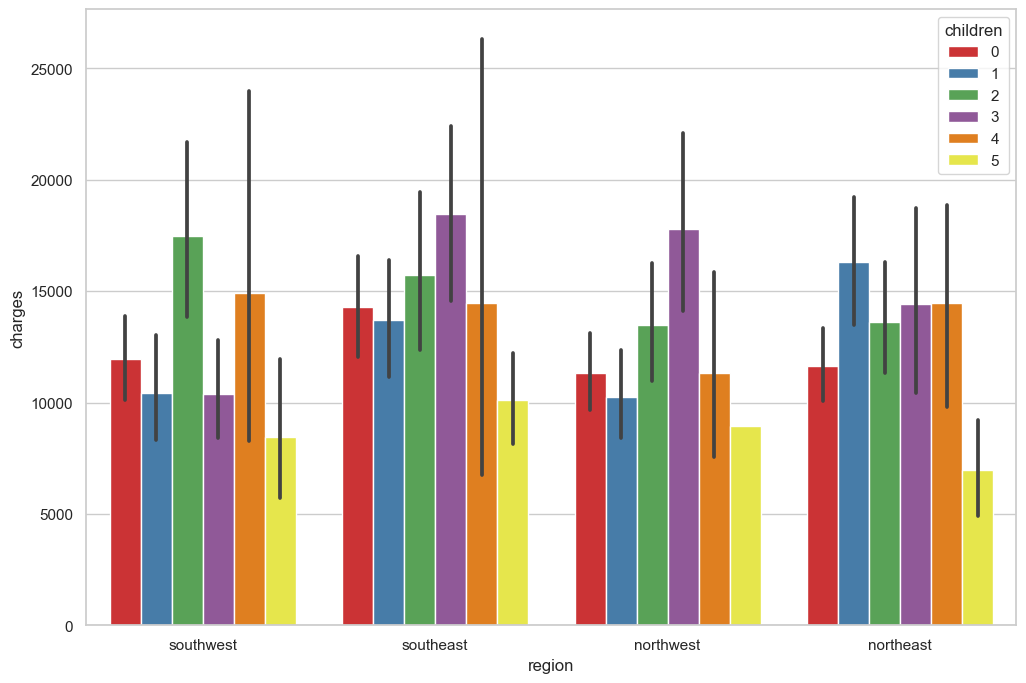

In [14]:
#Now i am creating a bar plot to compare the charges across different regions with the bars further grouped by the number of children using the hue

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

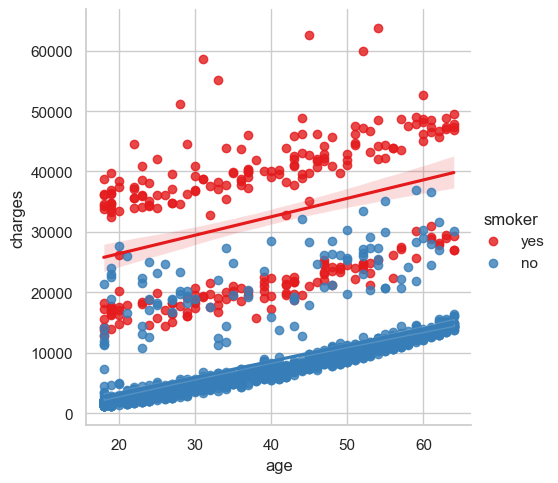

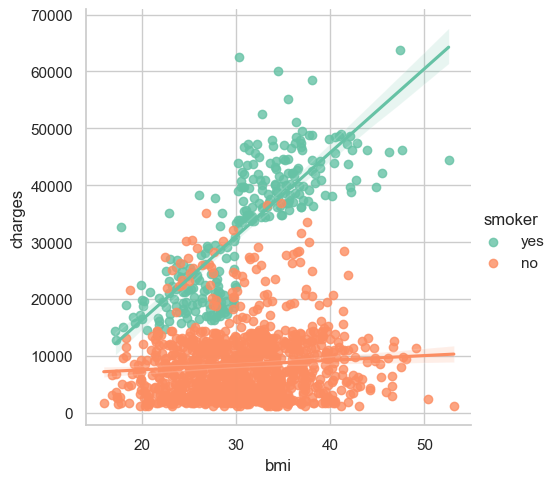

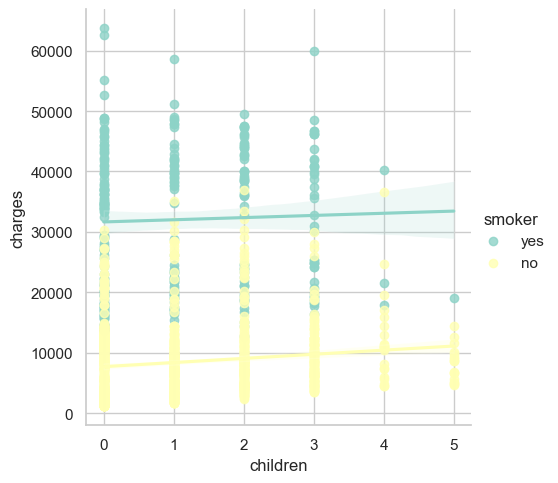

In [15]:
#Now i am creating three separate scatter plots to visualize the relationship between age bmi children with charges 
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette= 'Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette=  'Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette= 'Set3')

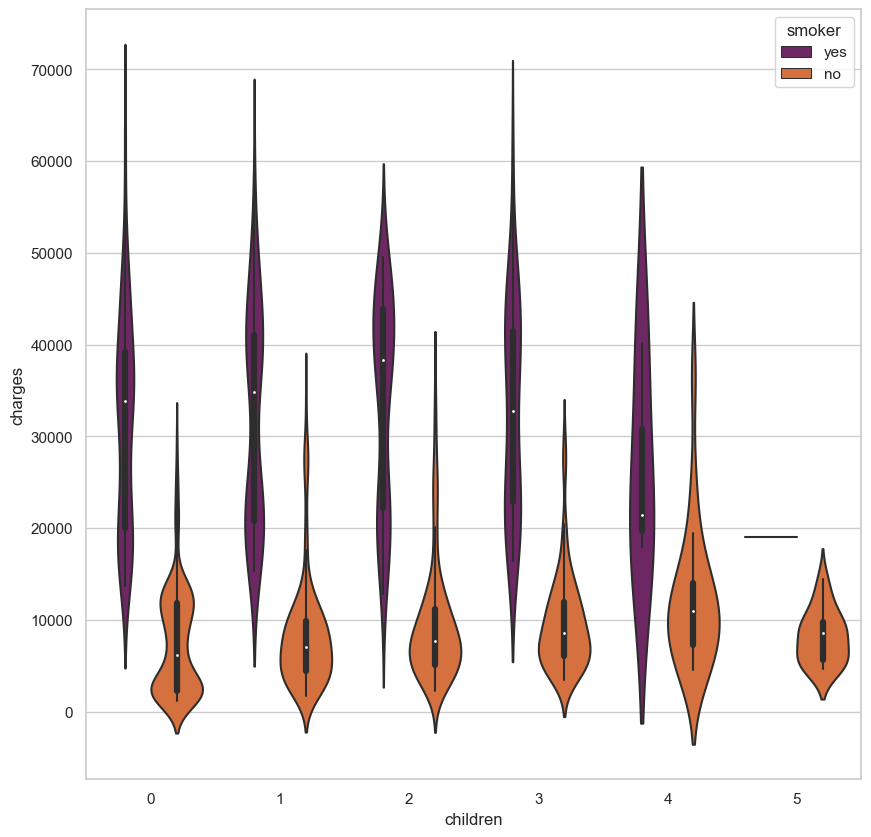

In [16]:
#Now I am using violiplot to visualize the distribution of charges on the number of children
f, ax = plt.subplots(1,1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df, orient= 'v', hue='smoker', palette= 'inferno')

In [17]:
#Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [18]:
##Converting category labels into numerical using LabelEncoder

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region =label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

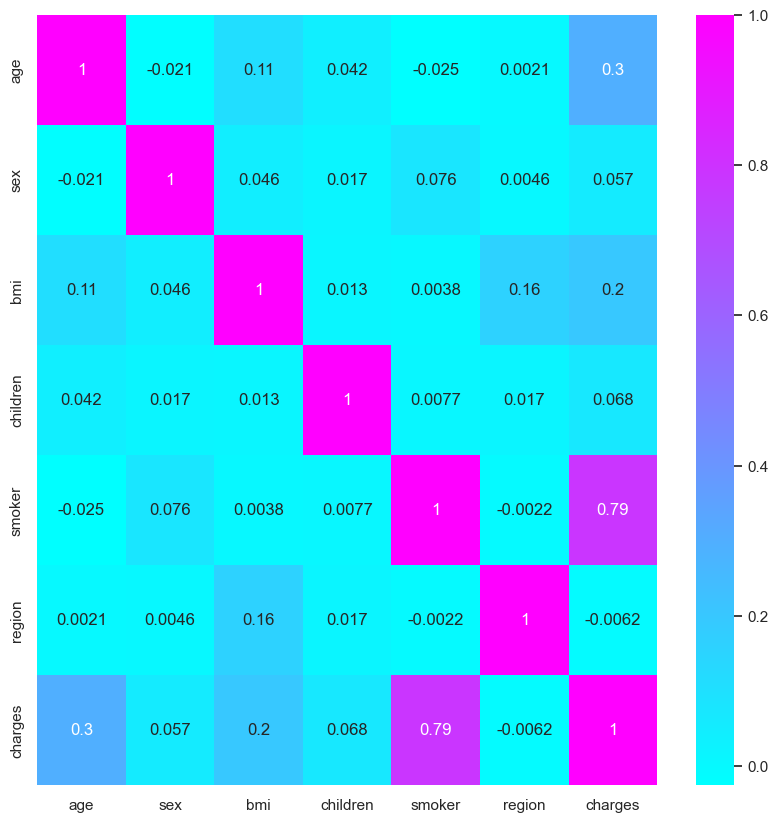

In [19]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot= True, cmap= 'cool')   

#  Training model

# Linear Regression

In [20]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Load the dateset
x = df.drop(['charges'],axis=1)
y = df['charges']

#Split the dataset inot training anf testing Datasets
x_train,x_test,y_train,y_test = holdout(x,y, test_size=0.2, random_state=0)

#create a Linear Regression model
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

#Print the Intercept,Coefficent ,and score of the model
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824424
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


# Ridge Regression

In [21]:
#Importing the required library
from sklearn.linear_model import Ridge

#Creating the Ridge Regression Model
Ridge = Ridge(alpha=0.5)

#Train the ridge Regression Model
Ridge.fit(x_train, y_train)

#Print the intercept,coeff,and score of the model
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495836
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063141


# Lasso Regression 

In [22]:
#Importing the library
from sklearn.linear_model import Lasso

#Create the lasso Regression Model
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False,max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

#Train the Lasso regression model
Lasso.fit(x_train, y_train)

#print the interncept,coed,socre of the model
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.838929039533
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224706


# Random Forest Regressor

In [23]:
#Importing the libraryt
from sklearn.ensemble import RandomForestRegressor as rfr

#load the dataset
x= df.drop(['charges'],axis = 1)
y= df.charges

#Create a Random Forest Regression
Rfr = rfr(n_estimators = 100, criterion ='squared_error',
                                 random_state=1,
                                    n_jobs = -1)
#Train the Random Forest Model
Rfr.fit(x_train,y_train)

#Make predictions of the model
x_train_pred= Rfr.predict(x_train)
x_test_pred= Rfr.predict(x_test)

#print the mean square of the model
print('MSE train data: %.3f, MSE test data: %.3f' % 
         (metrics.mean_squared_error(x_train_pred, y_train),
         metrics.mean_squared_error(x_test_pred,  y_test)))

MSE train data: 3628893.887, MSE test data: 19730453.910


# Results and Analysis

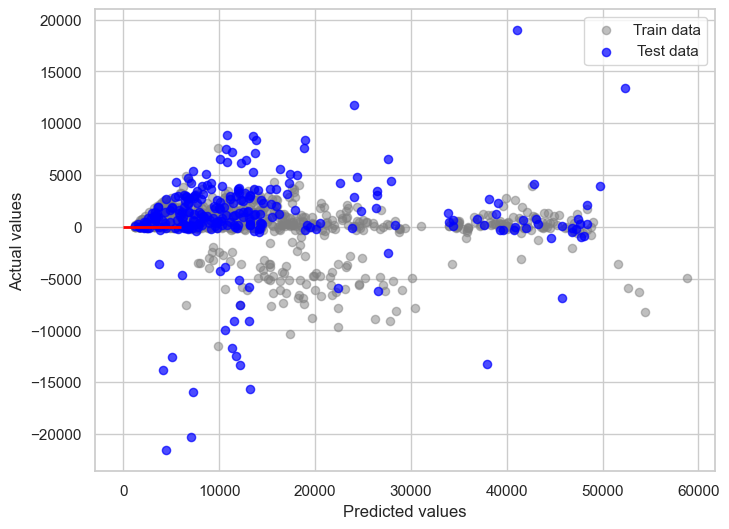

In [24]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
           c ='gray', marker = 'o', s=35, alpha =0.5,
            label = 'Train data')
plt.scatter(x_test_pred, x_test_pred -y_test,
           c ='blue', marker ='o', s=35, alpha = 0.7,
           label = ' Test data')

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y= 0, xmin =0 , xmax =6000, lw =2, color = 'red')

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

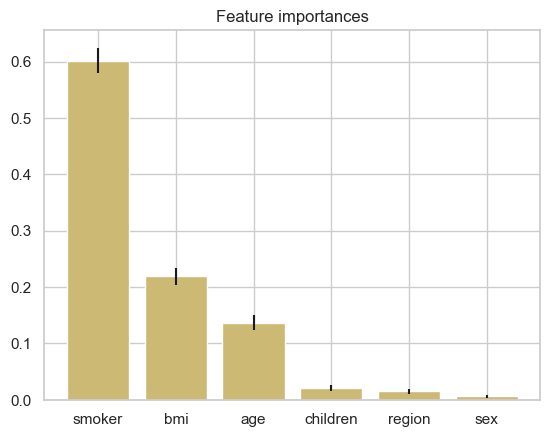

In [33]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis =0)
indices = np.argsort(importances)[::-1]
variables =['age','sex', 'bmi','children','smoker', 'region']
importance_list =[]
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)"% (f + 1, variable, importances[indices[f]]))
    
#Plot the feature importance of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
        color="y", yerr=std[indices], align="center")

# Polynomial Regression

In [36]:
#Importing the library
from sklearn.preprocessing import PolynomialFeatures

#Load the Data set
x = df.drop(['charges','sex','region'],axis =1)
y = df.charges

#Create polynomial features
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)

#Split the dataset into training and testing
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)

#Create the polynomial regression model
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

#make predictions of the model
y_train_pred = Pol_reg.predict(x_train)
y_test_pred  = Pol_reg.predict(x_test)

#print the intercept,coeff,and score of the model
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705252405
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345228


In [37]:
#Evaluating the performance of the algorithm
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error : 2824.4950454776426
Mean Squared Error: 18895160.09878039
Root Mean Squared Error: 4346.856346692445


In [39]:
#Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
#Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
